# Model Evaluation

## Evaluation Metrics:
### ROC AUC Score

The ROC AUC score was selected as the primary accuracy metric due to the class imbalance in the dataset. In imbalanced datasets, metrics like accuracy can be misleading because they may reflect the performance on the majority class while ignoring the minority class. The ROC AUC score, on the other hand, provides a balanced measure of a model's ability to distinguish between the classes, making it a more suitable metric for this scenario.

## Data Loading

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('../data/bank-additional/bank_processed_data.csv')

X = data.drop(['y'], axis=1)
y = data['y']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Test:", y_test.shape)

X Train: (32940, 76)
X Test: (8236, 76)
Y Train: (32940,)
Y Test: (8236,)


## Model Evaluation:
Evaluate model performance on the test set.

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier

# Baseline Model
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict_proba(X_test)
final_score = roc_auc_score(y_test, y_pred[:, 1])
print(f"Final Test ROC AUC: {final_score:.3f}")

Final Test ROC AUC: 0.500


In [3]:
import joblib
from sklearn.metrics import roc_auc_score

# Load Logistic Regression Model
best_model_lr = joblib.load('best_logistic_model.joblib')

# Evaluate the final model on the test set
y_pred = best_model_lr.predict_proba(X_test)
final_score = roc_auc_score(y_test, y_pred[:, 1])
print(f"Final Test ROC AUC: {final_score:.3f}")

Final Test ROC AUC: 0.828


In [4]:
# Load Random forest Model
best_model_forest = joblib.load('best_forest_model.joblib')

# Evaluate the final model on the test set
y_pred = best_model_forest.predict_proba(X_test)
final_score = roc_auc_score(y_test, y_pred[:, 1])
print(f"Final Test ROC AUC: {final_score:.3f}")

Final Test ROC AUC: 0.830


## Visualization:

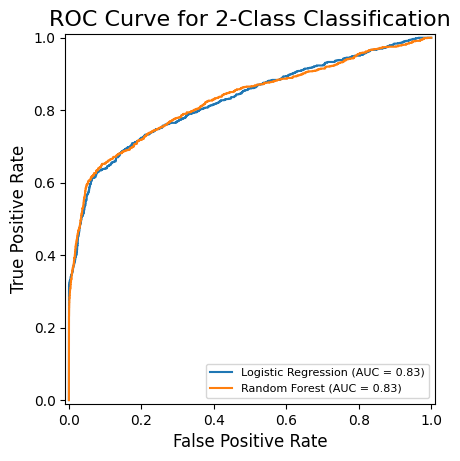

In [5]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot the ROC curve for the Logistic Regressioon
roc_display_lr = RocCurveDisplay.from_estimator(best_model_lr, 
                                                X_test, y_test, 
                                                name="Logistic Regression")


# Plot the ROC curve for the Random Forest on the same figure
RocCurveDisplay.from_estimator(best_model_forest, 
                               X_test, y_test, 
                               name="Random Forest", 
                               ax=roc_display_lr.ax_)

roc_display_lr.ax_.set_title("ROC Curve for 2-Class Classification", fontsize=16)
roc_display_lr.ax_.set_xlabel("False Positive Rate", fontsize=12)
roc_display_lr.ax_.set_ylabel("True Positive Rate", fontsize=12)

roc_display_lr.ax_.legend(loc="lower right", fontsize=8)

plt.show()

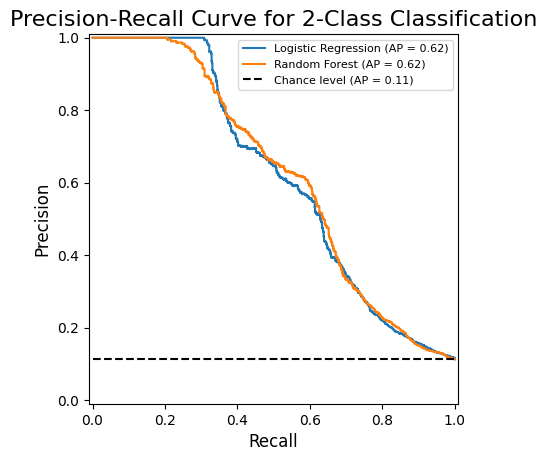

In [6]:
# Precision Recall Curve
from sklearn.metrics import PrecisionRecallDisplay

# Plot Precision-Recall curve for Logistic Regression
prc_lr = PrecisionRecallDisplay.from_estimator(
    best_model_lr, X_test, y_test,
    name="Logistic Regression",
    # plot_chance_level=True
)

# Plot Precision-Recall curve for Random Forest on the same axes
prc_forest = PrecisionRecallDisplay.from_estimator(
    best_model_forest, X_test, y_test,
    name="Random Forest",
    plot_chance_level=True,
    ax=prc_lr.ax_
)

prc_lr.ax_.set_title("Precision-Recall Curve for 2-Class Classification", fontsize=16)
prc_lr.ax_.set_xlabel("Recall", fontsize=12)
prc_lr.ax_.set_ylabel("Precision", fontsize=12)

prc_lr.ax_.legend(loc="upper right", fontsize=8)

plt.show()

## Model Evaluation: Comparing Final Model Performance with Baseline

In the final phase of my project, I focused on comparing the performance of my final models—Logistic Regression and Random Forest—with a baseline model. This comparison is crucial for understanding the effectiveness of the model development process, including feature engineering and hyperparameter tuning. Given the imbalanced nature of the dataset, where the goal was to predict whether a client subscribed to a term deposit ("yes" or "no"), these comparisons offer insights into the model's ability to handle such challenges.

### 1. **Baseline Model Overview**
The baseline model, which serves as a reference point, had a ROC AUC score of **0.50**. This score indicates that the baseline model has no discriminative power and is equivalent to random guessing. Such a model typically predicts the majority class or makes random predictions without utilizing any features effectively.

### 2. **Final Models Overview**
After applying feature engineering and hyperparameter tuning, both Logistic Regression and Random Forest classifiers achieved the following results:
- **ROC AUC Score**: **0.83**
- **Average Precision (AP)**: **0.62**
- **Chance Level AP**: **0.11**

These metrics reflect a significant improvement over the baseline model, particularly in how the models manage the imbalanced dataset.

### 3. **Performance Comparison**

- **ROC AUC Score**:
  - The baseline model's ROC AUC of 0.50 indicated no ability to distinguish between positive ("yes") and negative ("no") classes.
  - The final models' ROC AUC score of 0.83 demonstrates substantial discriminative power, meaning they can correctly rank positive instances higher than negative ones 83% of the time. This improvement reflects the effectiveness of the modeling process, including feature engineering and hyperparameter tuning.

- **Average Precision (AP)**:
  - The chance level AP of 0.11 highlights the challenges posed by the highly imbalanced dataset, where positive cases ("yes") are relatively rare.
  - The final models achieved an AP of 0.62, which indicates a significant improvement. This score suggests that the models are much better at maintaining precision across different recall levels compared to a random classifier (which would achieve an AP close to 0.11). The AP score reflects the model's ability to correctly identify clients who subscribed to a term deposit without generating an excessive number of false positives.

### 4. **Handling Imbalanced Data**
Given that the dataset is highly imbalanced, as evidenced by the chance level AP of 0.11, the improvements in ROC AUC and AP scores are particularly noteworthy. These metrics confirm that the final models are not only better at distinguishing between the classes but also more effective at identifying true positives in an imbalanced scenario.

### 5. **Conclusion**
The comparison between the final models and the baseline model shows a clear advancement in performance. The ROC AUC score improvement from 0.50 to 0.83 signifies a major enhancement in the model's ability to distinguish between clients who did and did not subscribe to a term deposit. Additionally, the increase in AP from 0.11 to 0.62 highlights the model's success in managing precision and recall in the face of class imbalance. These results confirm that the feature engineering and hyperparameter tuning steps were crucial in developing robust models capable of making accurate predictions in this imbalanced classification task.